In [3]:
%load_ext autoreload
%autoreload 2

from tweedejaars_project import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import *

df = load_df()
# df["temp"] = (df["forecast_wind"] + df["forecast_solar"]) / df["forecast_demand"]
# temp = df[110000:] # 110240 target is false maar is wel twoside

df["residual_load"] = df["forecast_demand"] - df["forecast_solar"] - df["forecast_wind"]
df["dispatch_diff"] = df["upward_dispatch_published"] - df["downward_dispatch_published"]
df["igcc_diff"] = df["igcc_contribution_up_published"] - df["igcc_contribution_down_published"]

version = "target"
target = "fix_two_sided_ptu_alt"
train_set = "train"
test_set = "valid"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


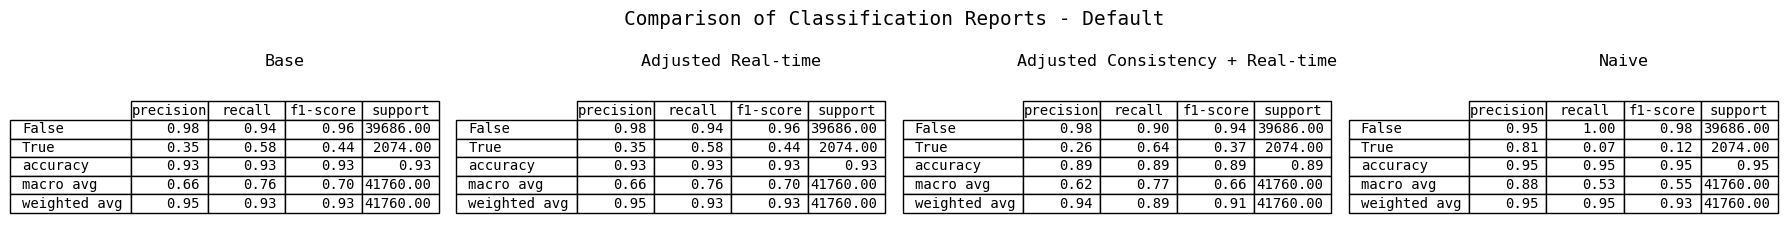

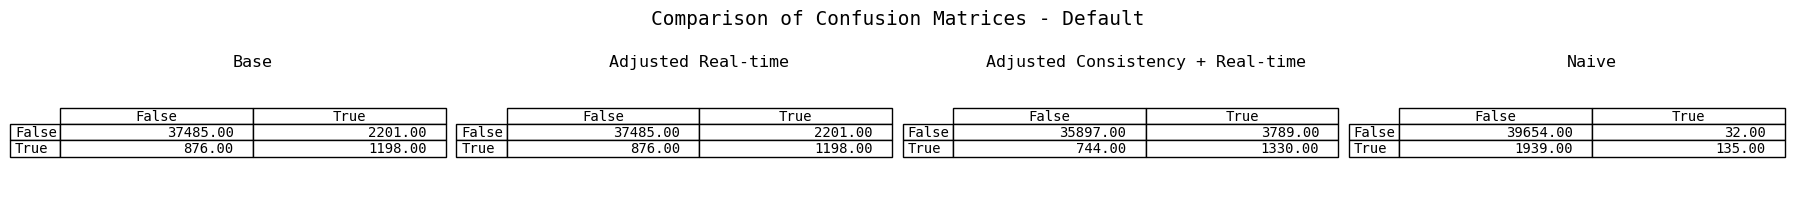

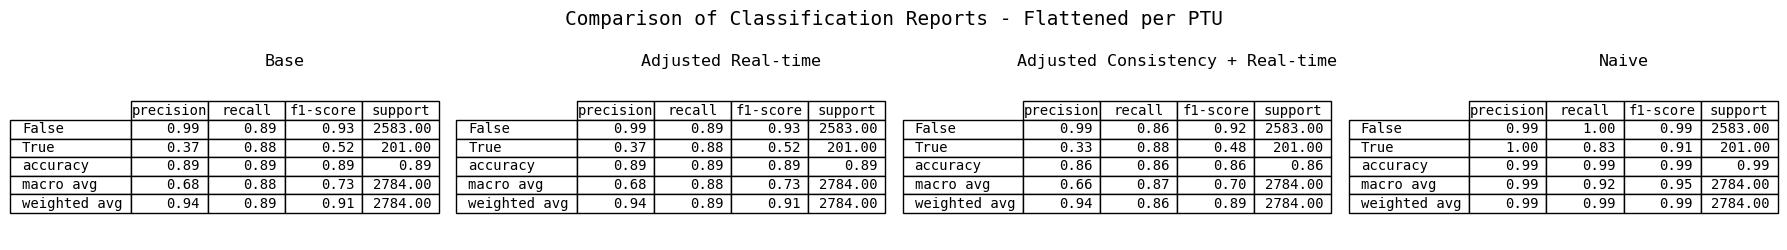

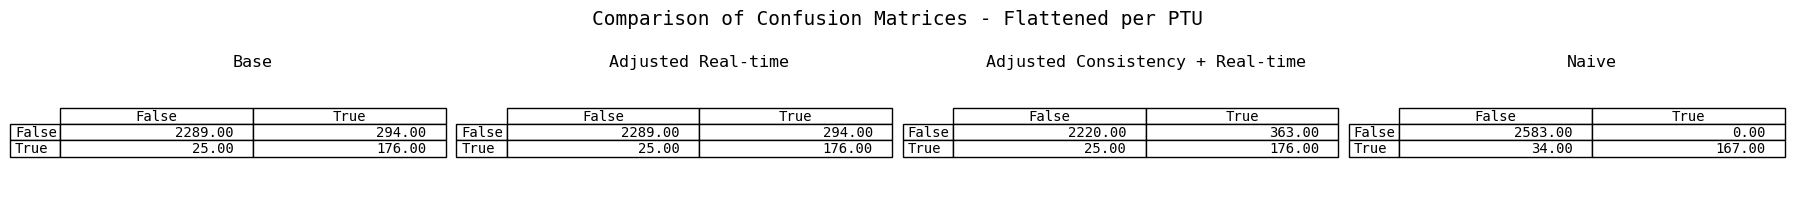

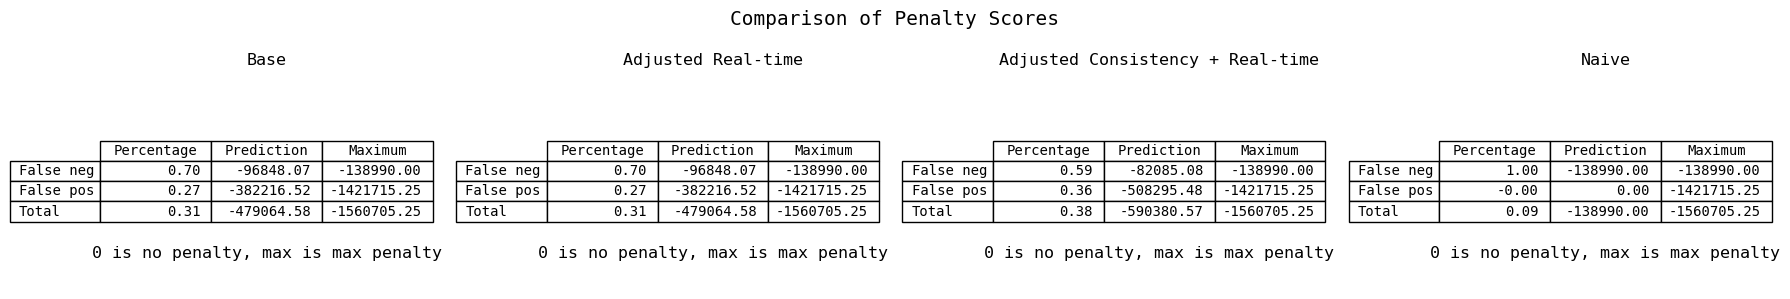

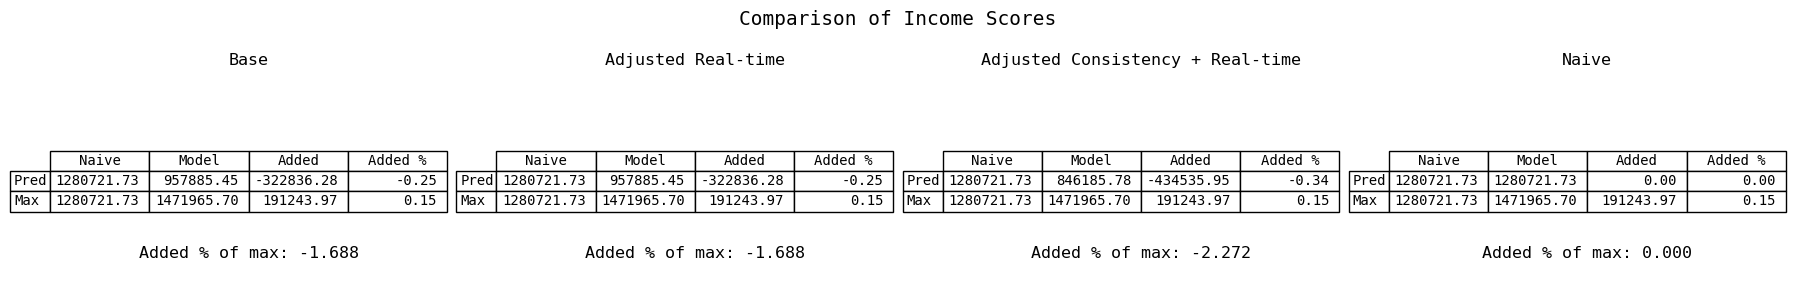

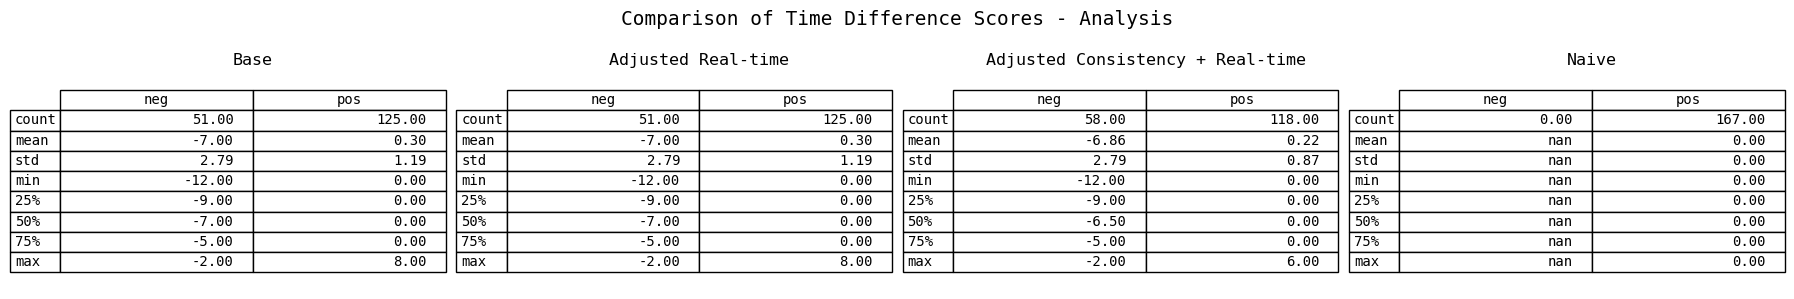

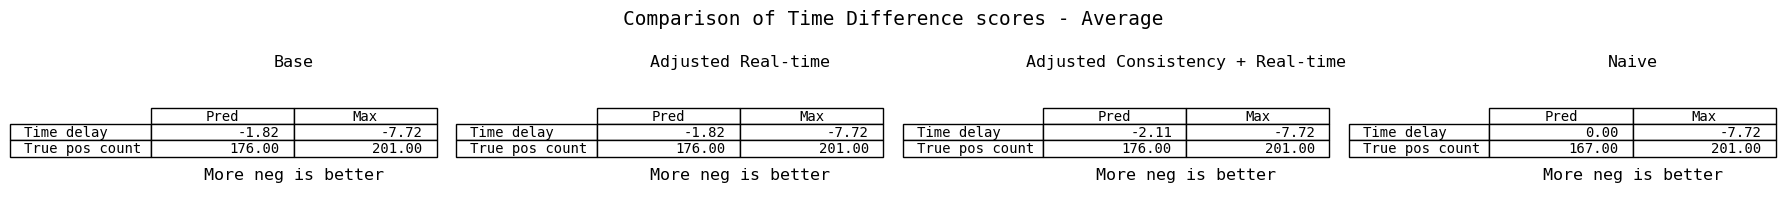

In [4]:
features = [
    "import_capacity",
    "min_price_published",
    "mid_price_published",
    "max_price_published",
    "min_ptu_price_known",
    "max_ptu_price_known",
    "settlement_price_bestguess",
    "time_since_last_two_sided",
    "two_sided_daily_count",
    "PTU",
    "naive_strategy_action",
    "forecast_wind",
    "forecast_solar",
    "forecast_demand",
    "target_two_sided_ptu_realtime"
]
splits = get_splits(df, features, target, return_dict_pair=False)
# m = RandomForestClassifier(n_estimators=50)
# m = HistGradientBoostingRegressor(loss="poisson")
m = HistGradientBoostingClassifier(random_state=42)
m.fit(splits[train_set][0], splits[train_set][1])
p = m.predict(splits[test_set][0])
p = p > 0.5
p1 = recast_pred(p)
show_metrics_adjusted(splits[test_set][3], p1, version=version)

# train on fix test on target
# split target and two side
# only check ptu start with neg or naive=true, for train or metric

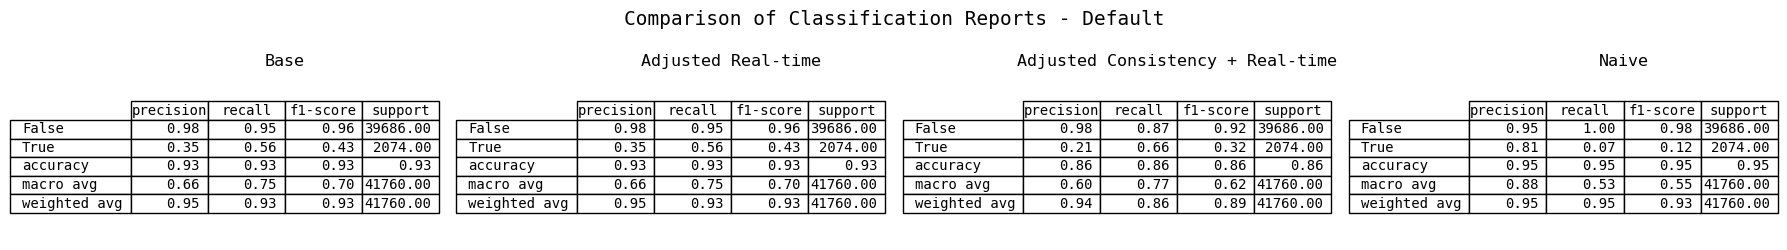

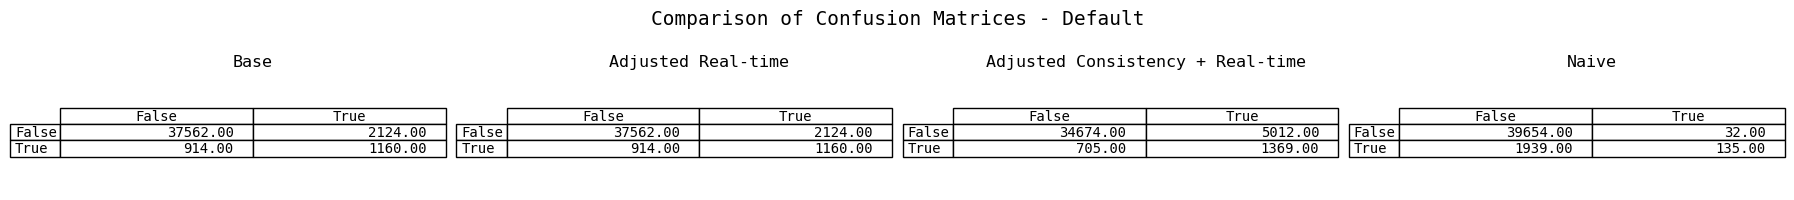

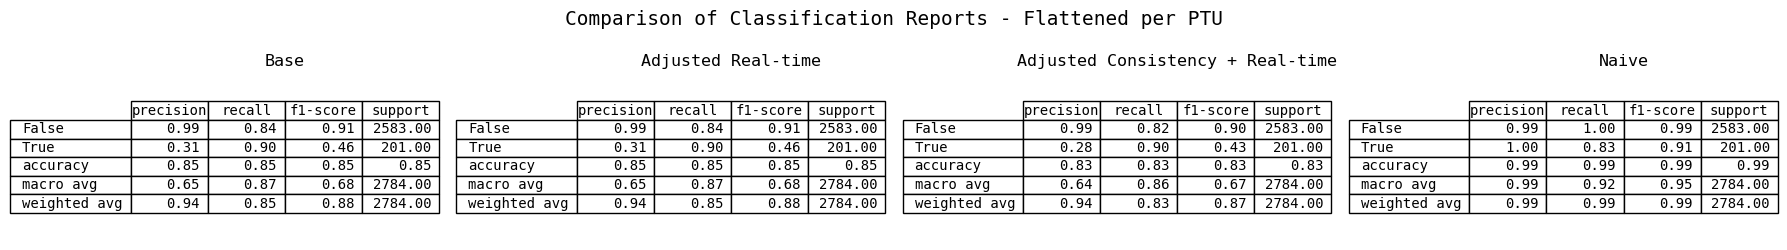

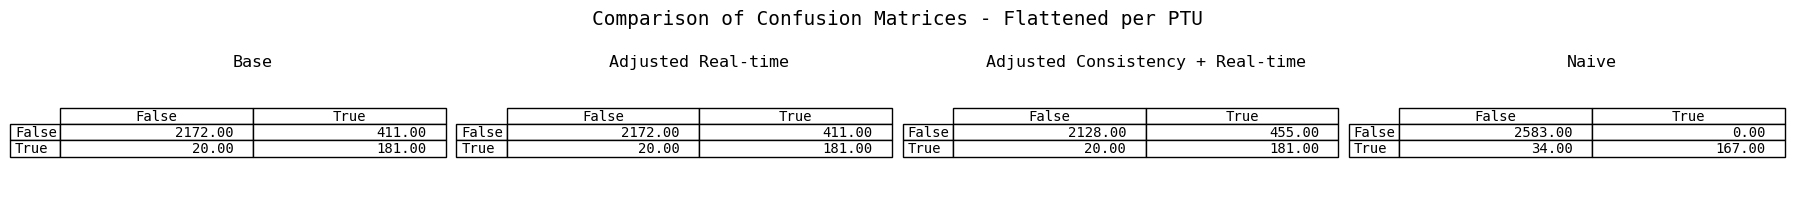

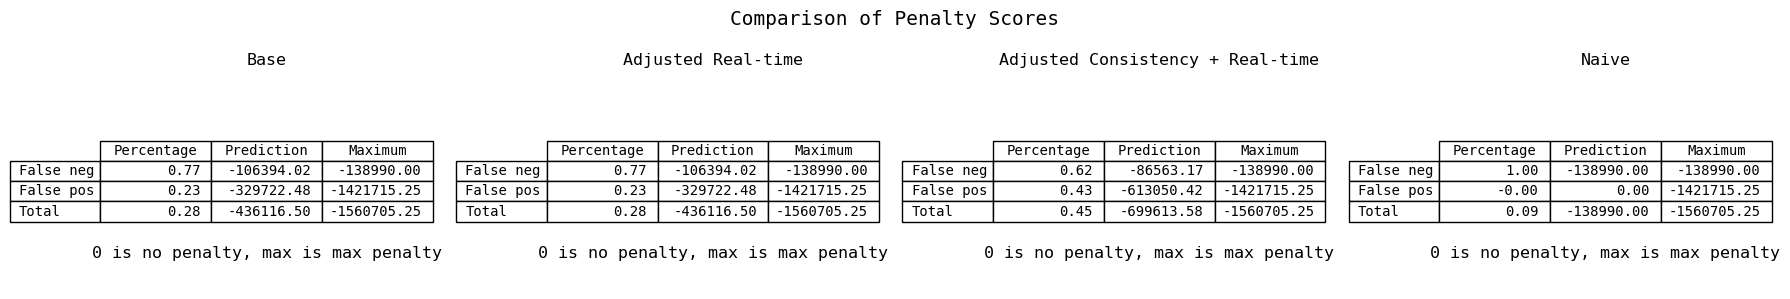

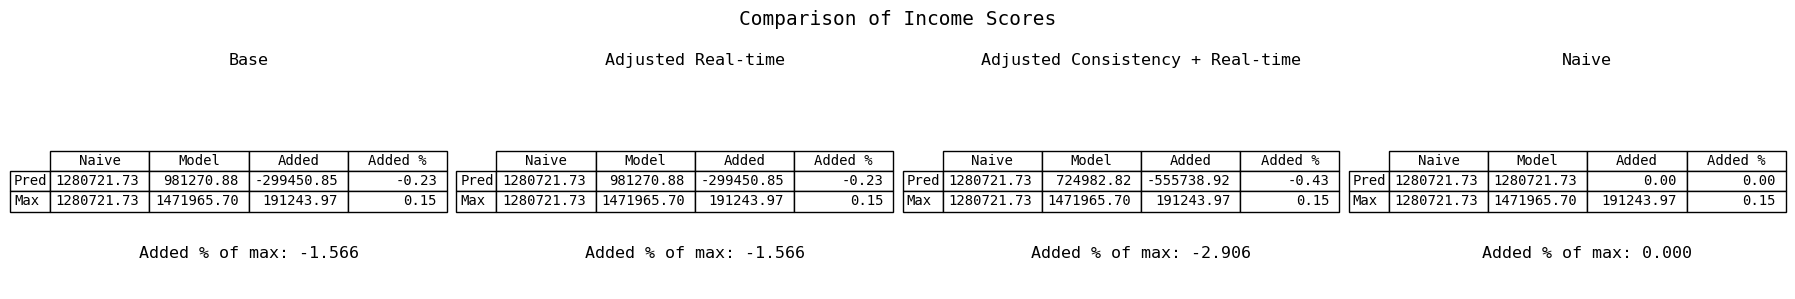

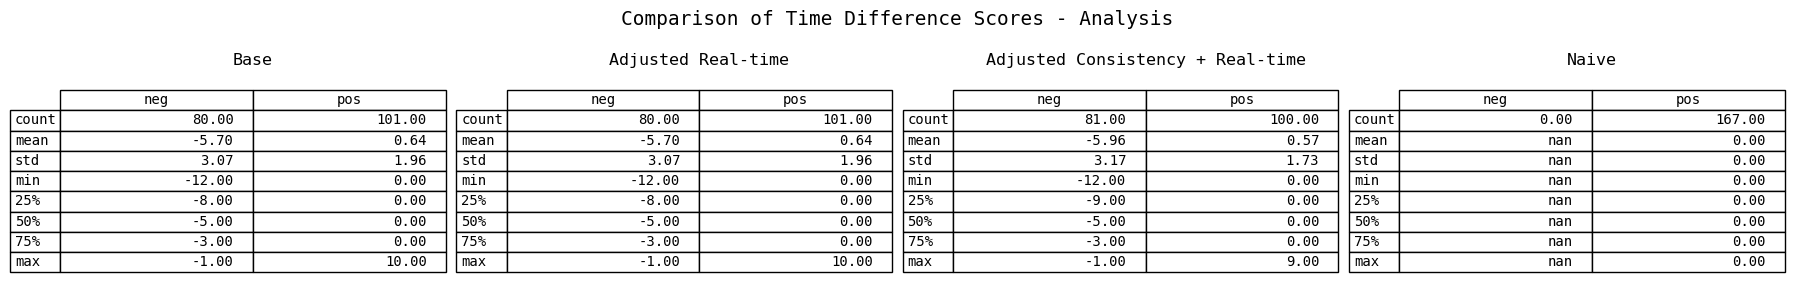

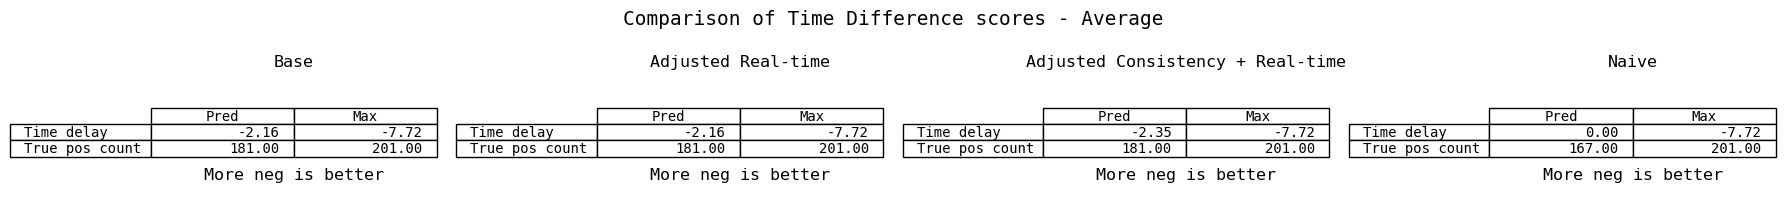

In [5]:
features = ["mid_price_published", "minute_in_ptu", "time_since_last_two_sided",
       "vwap_avg", "PTU", "forecast_demand", "ptu_id", "residual_load",
       "dispatch_diff", "igcc_diff"]
splits = get_splits(df, features, target, return_dict_pair=False)
# m = RandomForestClassifier(n_estimators=50)
# m = HistGradientBoostingRegressor(loss="poisson", l2_regularization=4)
m = HistGradientBoostingClassifier()
m.fit(splits[train_set][0], splits[train_set][1])
p = m.predict(splits[test_set][0])
# p = p > 0.5
p2 = recast_pred(p)
show_metrics_adjusted(splits[test_set][3], p2, version=version)

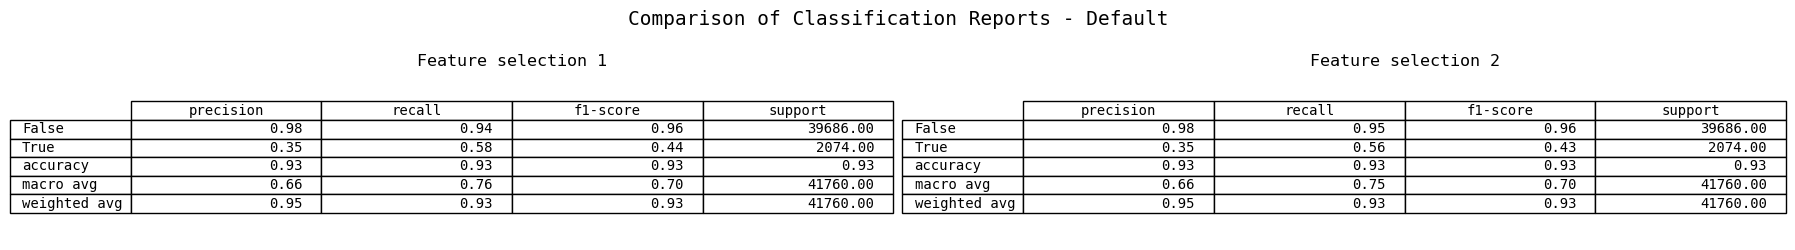

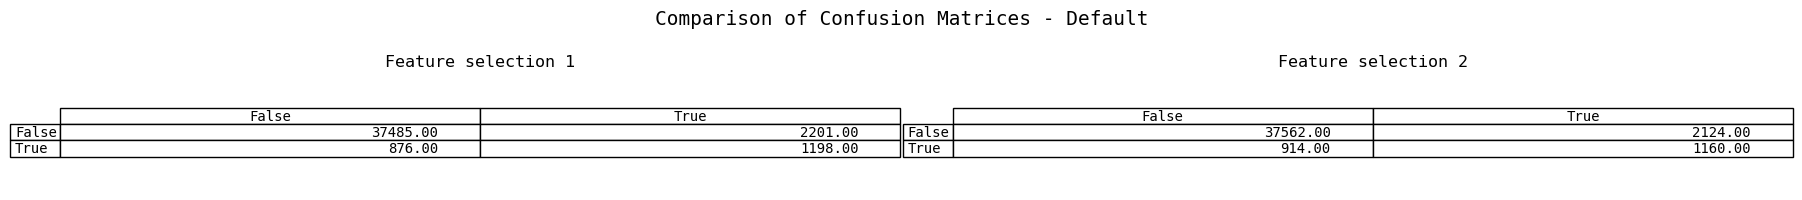

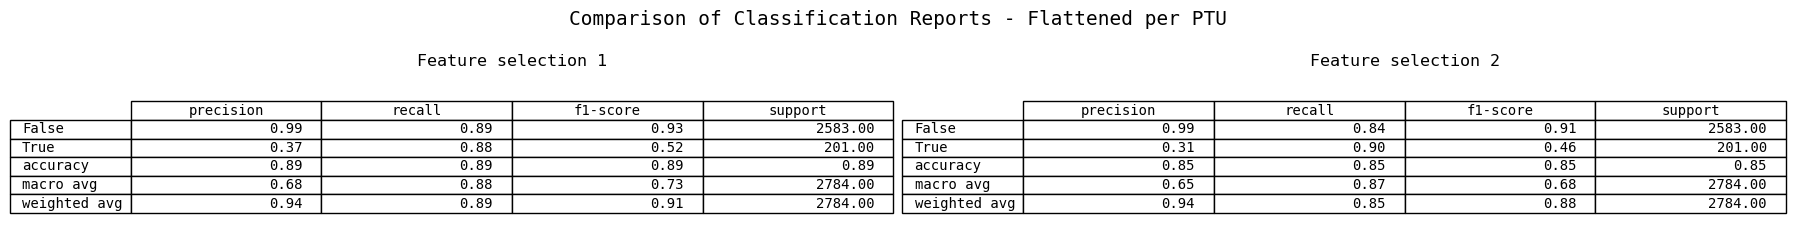

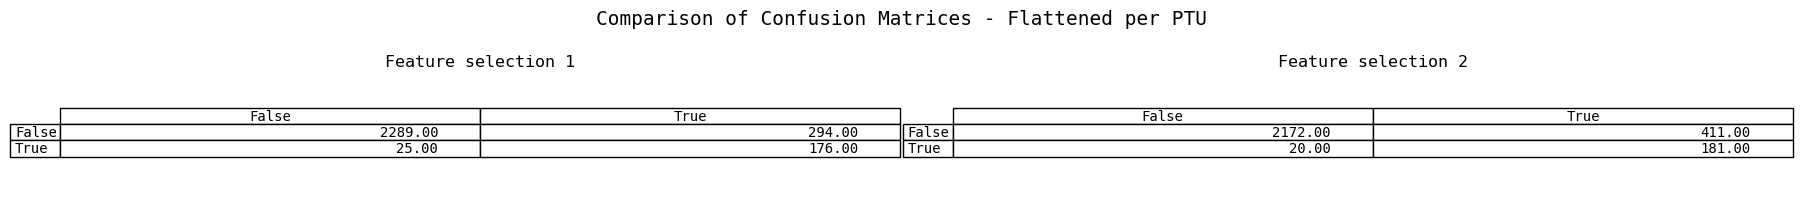

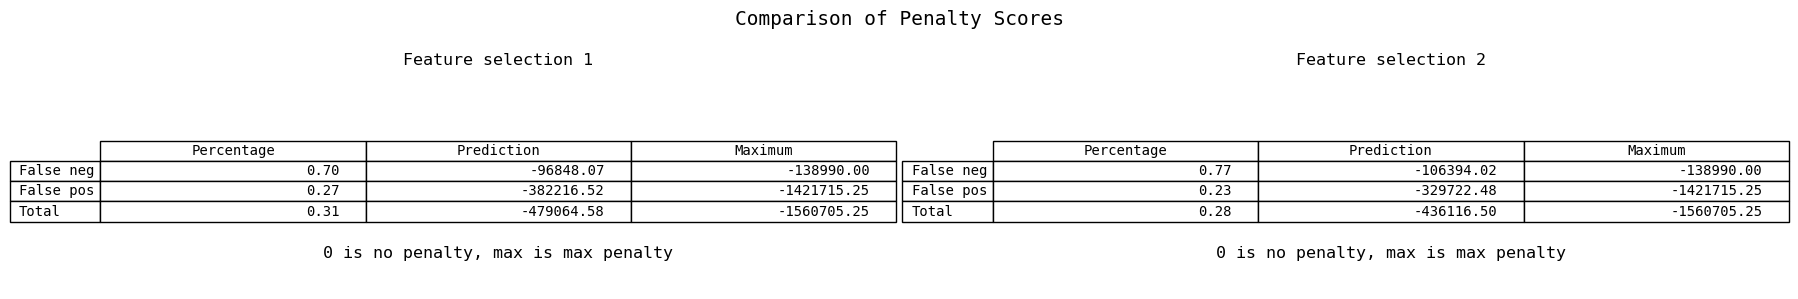

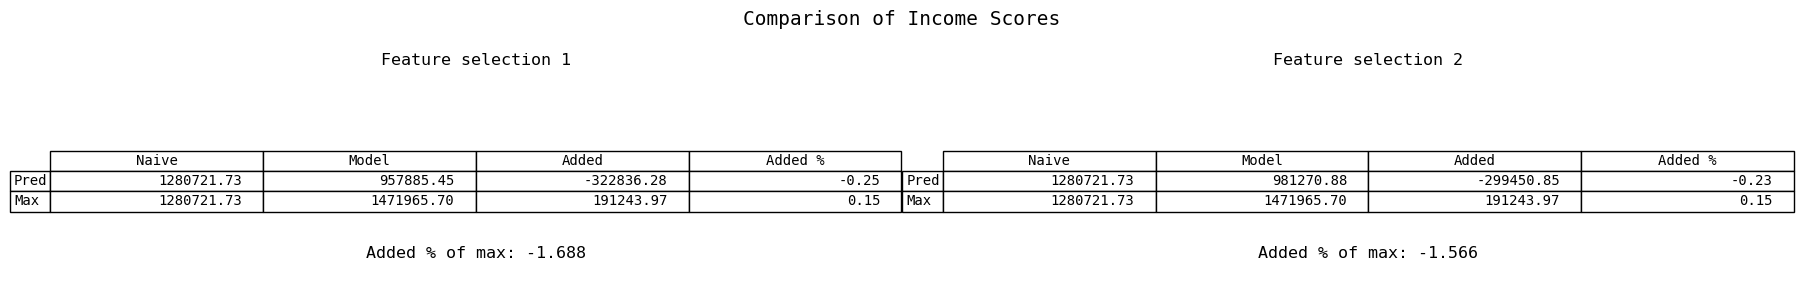

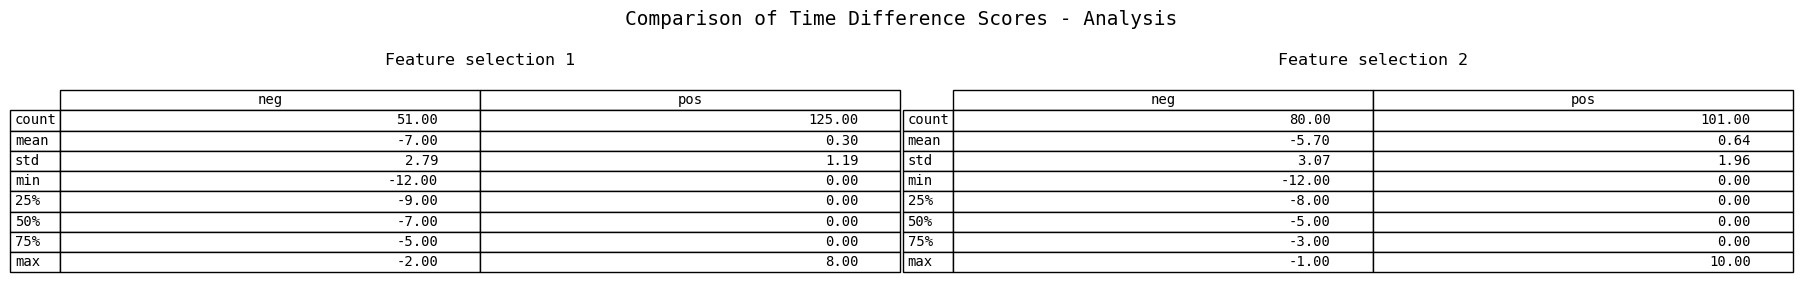

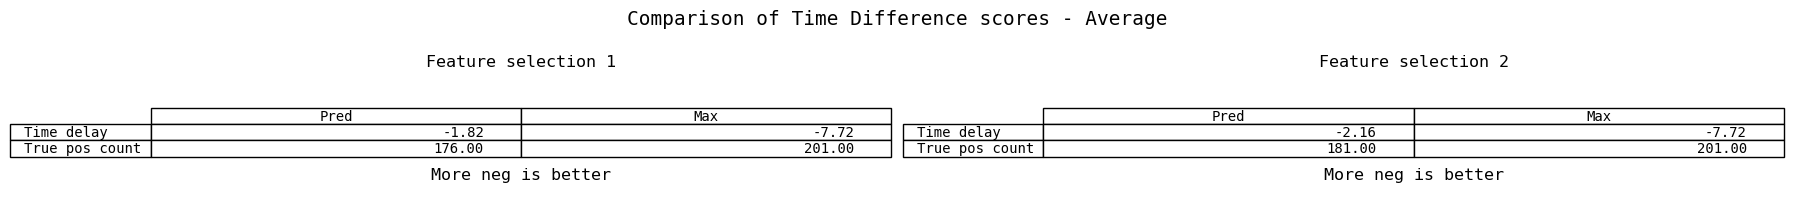

In [6]:
show_metrics_multi(splits[test_set][3], [p1, p2], titles=["Feature selection 1", "Feature selection 2"], version=version)